<a href="https://colab.research.google.com/github/mwithgod3952/Conquering-Kaggle-s-challenge/blob/main/Marketing_Analytics_Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 4>Data preparation</font>

In [ ]:
# font
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
# Basic environment
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    ITALIC = '\x1B'

# drive
from google.colab import drive; drive.mount('/content/drive', force_remount=True)

# path
import os

org_pth = '/content/drive/MyDrive'
_new_pth = [x for x in os.listdir(org_pth) if x.startswith('Cohort')][0]
new_pth = f'{org_pth}/{_new_pth}' 

if new_pth.startswith('/content') and new_pth.endswith('practice'):
    os.chdir(new_pth)
    wp = os.getcwd()
    print(f'\t\n {new_pth}')

Mounted at /content/drive
	
 /content/drive/MyDrive/Cohort_Analysis_practice


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files; files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jhleekr","key":"740259ff05a1aa87d388c6ecd1153f10"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d carrie1/ecommerce-data
!kaggle datasets download -d mustafacicek/online-retail-final

print('\n')

!unzip ecommerce-data
!unzip online-retail-final

  0% 0.00/7.20M [00:00<?, ?B/s]
100% 7.20M/7.20M [00:00<00:00, 121MB/s]
  0% 0.00/6.30M [00:00<?, ?B/s]
100% 6.30M/6.30M [00:00<00:00, 154MB/s]


Archive:  ecommerce-data.zip
  inflating: data.csv                
Archive:  online-retail-final.zip
  inflating: online_retail_final.csv  


In [2]:
dataset = [x for x in os.listdir(wp) if x.endswith('.csv')]
print(dataset)

['data.csv', 'online_retail_final.csv']


<font size = 4>Library</font>

In [3]:
# analyzation
import re
import ast
import random
import numpy as np
import pandas as pd
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# visualization
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
%matplotlib inline
import seaborn as sns

from google.colab import data_table

# options
pd.options.mode.chained_assignment = None

In [4]:
df1 = pd.read_csv(f'{wp}/{dataset[0]}', encoding= 'unicode_escape')
df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
print(f'\t\n {color.BOLD}Shape : {df1.shape}{color.END} \n')

print(f'{color.BOLD}- NULL{color.END}')
print(df1.isnull().sum())
print('\n')

	
 Shape : (541909, 8) 

- NULL
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64




In [6]:
df1[df1.Description.isnull()].iloc[:2, :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom


In [7]:
des_nullDf = df1[df1.Description.isnull()].reset_index( drop=True )

In [8]:
if len(des_nullDf) == des_nullDf.CustomerID.isnull().sum():
    print('T')
else:
    print('F')

T


In [9]:
des_nullDf.UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

<font size = 2>상위의 과정을 통해 "Description" 열에 포함된 내용이 없을 때 "CustomerID" 정보 역시 누락되어 있음을 확인하였습니다, 더불어, "UnitPrice"는 0임을 확하였습니다.</font>

In [10]:
des_notnullDf = df1[df1.Description.notnull()].reset_index( drop=True )
ID_NULL_cnt = des_notnullDf.CustomerID.isnull().sum()
print(f'\n\t {color.BOLD}- "Description"정보가 확인되나, ID 정보가 누락된 경우의 수 : {ID_NULL_cnt}{color.END}')


	 - "Description"정보가 확인되나, ID 정보가 누락된 경우의 수 : 133626


In [11]:
print(f'\n\t - {color.BOLD}"StockCode"정보는 정수로만 이루어져 있거나 정수와 함께 문자열이 결합되어 기록된 것이 일반적이고, 이 외 주식코드 검색을 목적으로 문자열로만 이루어진 것들이 아래와 같이 존재합니다.{color.END}\n')
for i in df1[df1['StockCode'].apply(lambda x: str('Y') if re.search('[0-9]+', x) else str('N')) == 'N'].StockCode.unique():
    print(f'\t\t {i}')


	 - "StockCode"정보는 정수로만 이루어져 있거나 정수와 함께 문자열이 결합되어 기록된 것이 일반적이고, 이 외 주식코드 검색을 목적으로 문자열로만 이루어진 것들이 아래와 같이 존재합니다.

		 POST
		 D
		 DOT
		 M
		 BANK CHARGES
		 S
		 AMAZONFEE
		 m
		 DCGSSBOY
		 DCGSSGIRL
		 PADS
		 B
		 CRUK


In [12]:
df1 = df1[df1.Description.notnull() & df1.CustomerID.notnull()]
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
df1.loc[df1['InvoiceNo'].apply(lambda x: str('Y') if re.search('[a-zA-Z]+', x) else str('N')) == 'Y', 'InvoiceNo'].apply(lambda x: str(x)[0]).unique()

array(['C'], dtype=object)

In [14]:
wC  = df1[df1['InvoiceNo'].apply(lambda x: x.startswith('C'))]
nwC = df1[df1['InvoiceNo'].apply(lambda x: True if len(set('AC') & set(x)) == 0 else False)]
if (len(wC) == sum(wC.Quantity < 0)) and (len(nwC) == sum(nwC.Quantity >= 0)):
    print('T')
else:
    print('N')    

T


<font size = 2>'InvoiceNO'정보 값 중 특정 값에 알파벳 값이 결합된 경우를 발견하여 확인해본 결과, 일반 정수값 번호 외에 'C'와 'A'가 결합된 경우를 확인하였습니다.</font>

<font size = 2>그 중, 'C'로 구분한 Quantity값이 모두 음수 인 것을 확인하였고 더불어, Quantity값이 음수이나 'InvoiceNO'값이 잘못 구분된 케이스 역시 없음으로, 취소된 주문건을 구분하기 위한 구분자임을 확신할 수 있습니다.</font>


<font size = 2>우선 'Cancelled'라는 열을 만들어 주문취소가 포함된 행을 1로 나머지 행을 0으로 구분합니다.</font>


In [15]:
df1.loc[wC.index, 'Cancelled'] = int(1); df1.loc[df1.Cancelled.isnull(), 'Cancelled'] = int(0)

<font size = 2>아래부터는 주문건에 대한 정보만을을 취합하여 분석을 진행하겠습니다.</font>

In [16]:
_df1 = df1[df1.Cancelled == 0]
_df1.Cancelled.value_counts()

0.0    397924
Name: Cancelled, dtype: int64

In [17]:
col_relevance = []
contain_alpha = _df1[_df1['StockCode'].str.contains("^[a-zA-Z]")]
stc_str = contain_alpha.iloc[:, 1].value_counts().index.tolist()
for i in range(len(stc_str)):
    y = set(list(map(lambda x: str(x), _df1[_df1['StockCode'] == stc_str[i]].loc[:, ['StockCode', 'Description']].values.tolist())))
    col_relevance.append(ast.literal_eval(list(y)[0]))

cr_df = pd.DataFrame( columns=list(_df1.columns)[1:] )   
for i in range(2):
    cr_df.iloc[:, i] = list(zip(*col_relevance))[i]
for j in range(len(stc_str)):
    cr_df.iloc[j, 2:] = random.sample(_df1[_df1.StockCode == stc_str[j]].iloc[:, 3:].values.tolist(), 1)[0] 

print(f'{color.BOLD}- number of values ​​containing the alphabet{color.END}')
print(contain_alpha.StockCode.value_counts())
print(f'{color.BLUE}-{color.END}'*3)
print(f'{color.BOLD}- comparison table comparing the values ​​of the Stockcode and other columns{color.END}')
cr_df    

- number of values ​​containing the alphabet
POST            1099
M                290
C2               133
DOT               16
BANK CHARGES      12
PADS               4
Name: StockCode, dtype: int64
---
- comparison table comparing the values ​​of the Stockcode and other columns


,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
0,POST,POSTAGE,5,7/25/2011 12:22,40.0,13520.0,Switzerland,0.0
1,M,Manual,6,1/4/2011 14:47,1.65,16814.0,United Kingdom,0.0
2,C2,CARRIAGE,1,6/19/2011 16:11,50.0,14911.0,EIRE,0.0
3,DOT,DOTCOM POSTAGE,1,9/26/2011 15:28,688.08,14096.0,United Kingdom,0.0
4,BANK CHARGES,Bank Charges,1,11/4/2011 14:59,15.0,13651.0,United Kingdom,0.0
5,PADS,PADS TO MATCH ALL CUSHIONS,1,9/25/2011 12:22,0.0,16133.0,United Kingdom,0.0


<font size = 2></font>

In [18]:
_df1 = _df1[~ _df1['StockCode'].str.contains("^[a-zA-Z]")]

In [19]:
_df1.loc[:, 'Description'] = list(_df1.Description.str.lower())

In [20]:
def Vis_rank_and_cnt(colN='CustomerID', topicN='고객', rt=0.01, clr='Reds_r'):

    Y = _df1[colN].value_counts().sort_values(ascending=False).head(round((len(_df1) / 100)*rt))

    fig, ax = plt.subplots( figsize=(6, 9) )
    sns.barplot(y=Y.index, x=Y.values, orient='h', ax=ax, order=Y.index, palette=clr)

    plt.ylabel(colN)
    plt.xlabel('Transection Count')
    plt.title(f'{topicN} ID 기준 재방문 수치 및 상위 {rt}% 순위표')
    
    return plt.show()    

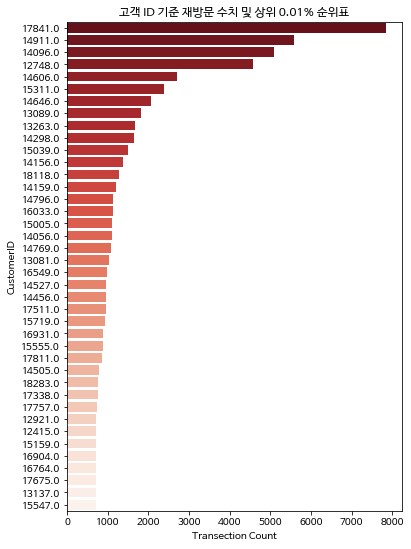

In [21]:
Vis_rank_and_cnt(colN='CustomerID', topicN='고객')

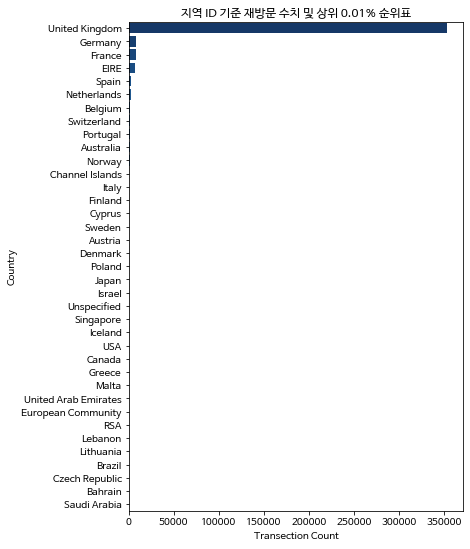

In [22]:
Vis_rank_and_cnt(colN='Country', topicN='지역', rt=0.01, clr='Blues_r')

<font size = 2>위의 분석을 통해 고객 및 지역 기준 재방문 수를 확인할 수 있습니다.</font>

<font size = 2>고객의 경우 약 4000번을 기준으로 상위그룹이 구분됨을 알수 있습니다. 지역의 경우 영국이 독보적으로 높다는 것을 알 수 있습니다.</font>




In [85]:
price_nunq = _df1.groupby('StockCode').UnitPrice.nunique()
price_nunq[price_nunq != 1].describe()

count    2624.000000
mean        2.815549
std         1.079163
min         2.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        12.000000
Name: UnitPrice, dtype: float64

<Figure size 360x360 with 0 Axes>

In [107]:
over3_codes = list(set(price_nunq[price_nunq >= 3].index))
indexes = list(map(lambda x: np.where(_df1.reset_index(drop=True).StockCode == x)[0].tolist(), over3_codes))
m_indexes = sum(indexes, [])
over3_df = _df1.reset_index(drop=True).iloc[sorted(m_indexes)].reset_index(drop=True)
over3_df.loc[:, 'InvoiceDate'] = over3_df.InvoiceDate.apply(lambda x: pd.to_datetime(x))

In [124]:
over3_df.groupby('StockCode')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0.0
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.0
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0.0
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.0
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
279667,581587,23256,childrens cutlery spaceboy,4,2011-12-09 12:50:00,4.15,12680.0,France,0.0
279668,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,0.0
279669,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,0.0
279670,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,0.0


In [137]:
import matplotlib.dates as mdates

In [138]:
def generate_random_data(N=100):
    '''
    Returns a dataframe with N rows of random data.
    '''
    list_of_lists = []
    labels = ['foo', 'bar', 'baz']
    epoch = 1515617110
    for _ in range(N):
        key = random.choice(labels)
        value = 0
        if key == 'foo':
            value = random.randint(1, 10)
        elif key == 'bar':
            value = random.randint(50, 60)
        else:
            value = random.randint(80, 90)
        epoch += random.randint(5000, 30000)
        row = [key, epoch, value]
        list_of_lists.append(row)
    df = pd.DataFrame(list_of_lists, columns=['my_series', 'epoch', 'my_value'])
    df['my_timestamp'] = pd.to_datetime(df['epoch'], unit='s')
    df = df[['my_timestamp', 'my_series', 'my_value']]
    #df.set_index('ts', inplace=True)
    return df

def plot_gb_time_series(df, ts_name, gb_name, value_name, figsize=(20,7), title=None):
    '''
    Runs groupby on Pandas dataframe and produces a time series chart.

    Parameters:
    ----------
    df : Pandas dataframe
    ts_name : string
        The name of the df column that has the datetime timestamp x-axis values.
    gb_name : string
        The name of the df column to perform group-by.
    value_name : string
        The name of the df column for the y-axis.
    figsize : tuple of two integers
        Figure size of the resulting plot, e.g. (20, 7)
    title : string
        Optional title
    '''
    xtick_locator = mdates.DayLocator(interval=1)
    xtick_dateformatter = mdates.DateFormatter('%m/%d/%Y')
    fig, ax = plt.subplots(figsize=figsize)
    for key, grp in df.groupby([gb_name]):
        ax = grp.plot(ax=ax, kind='line', x=ts_name, y=value_name, label=key, marker='o')
    ax.xaxis.set_major_locator(xtick_locator)
    ax.xaxis.set_major_formatter(xtick_dateformatter)
    ax.autoscale_view()
    ax.legend(loc='upper left')
    _ = plt.xticks(rotation=90, )
    _ = plt.grid()
    _ = plt.xlabel('')
    _ = plt.ylim(0, df[value_name].max() * 1.25)
    _ = plt.ylabel(value_name)
    if title is not None:
        _ = plt.title(title)
    _ = plt.show()

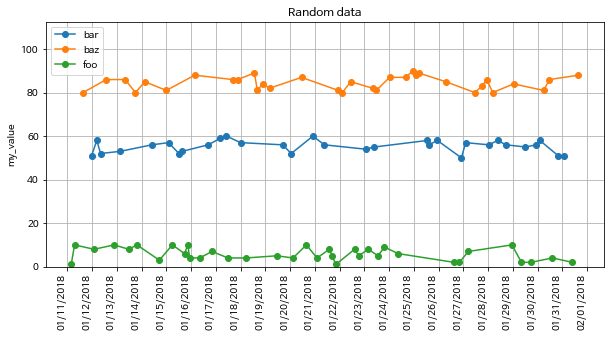

In [139]:
df = generate_random_data()

plot_gb_time_series(df, 'my_timestamp', 'my_series', 'my_value',
                    figsize=(10, 5), title="Random data")


	 - minimum value: 0.0, median value: 1.95, maximum value: 649.5
	 - The number of cases where a unit price is zero: 33




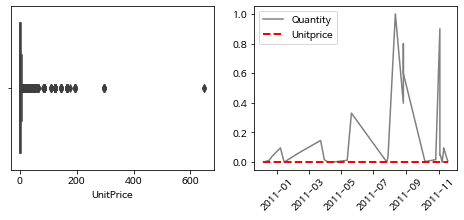

In [75]:
print(f"\t {color.BOLD}- minimum value: {_df1.UnitPrice.describe()['min']}, median value: {np.median(_df1.UnitPrice)}, maximum value: {_df1.UnitPrice.describe()['max']}{color.END}")

fig, axes = plt.subplots(1, 2, figsize=(8, 3) )
sns.boxplot(x=_df1.UnitPrice, ax=axes[0])

up_e0 = _df1[_df1['UnitPrice'] == 0].reset_index(drop=True).iloc[:-1]
up_e0['InvoiceDate'] = up_e0.InvoiceDate.apply(lambda x: pd.to_datetime(x))
up_e0 = up_e0.sort_values(by='InvoiceDate')

print(f"\t - The number of cases where a unit price is zero: {sum(_df1['UnitPrice'] == 0)}")
print('\n')

color = ["grey", "red", '#edae49', '#66a182']
scaler = MinMaxScaler()
scaled = scaler.fit_transform(up_e0.iloc[:, [3, 5]].values.tolist())

axes[1].plot(up_e0.InvoiceDate, scaled[:, 0], color=color[0], label='Quantity')
axes[1].plot(up_e0.InvoiceDate, scaled[:, 1], color=color[1], linestyle='--', linewidth=2, label='Unitprice')
axes[1].legend(loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

plt.show()

<font size = 2></font>